# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.385729e+01     1.587722e+01
 * time: 0.0028820037841796875
     1     6.503717e+01     9.710041e+00
 * time: 0.008340835571289062
     2     5.654283e+01     1.383749e+01
 * time: 0.02141094207763672
     3     4.204385e+01     1.006030e+01
 * time: 0.10588383674621582
     4     3.062756e+01     8.326114e+00
 * time: 0.12383890151977539
     5     2.521876e+01     6.799606e+00
 * time: 0.1396780014038086
     6     1.165243e+01     2.805919e+00
 * time: 0.1553809642791748
     7     8.618837e+00     2.929567e+00
 * time: 0.1688089370727539
     8     7.037539e+00     2.266909e+00
 * time: 0.1820669174194336
     9     6.841327e+00     3.086190e+00
 * time: 0.22546076774597168
    10     6.401948e+00     2.324230e+00
 * time: 0.2389538288116455
    11     6.234390e+00     1.384291e+00
 * time: 0.25461697578430176
    12     6.135582e+00     1.439062e+00
 * time: 0.26547884941101074
    13     6.052610e+00     1.272834e+00
 * time: 0

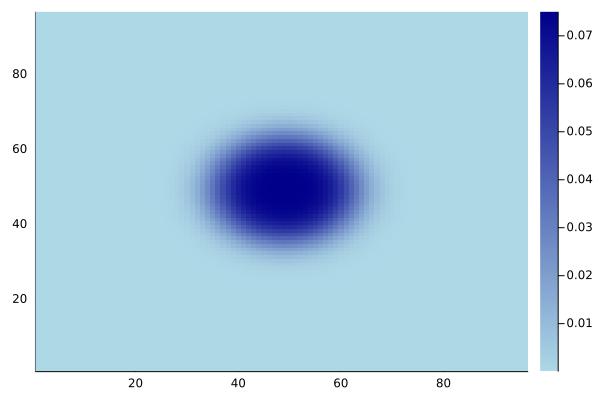

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))